In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Train set: {x_train.shape}, Labels: {len(y_train)}")
print(f"Validation set: {x_val.shape}, Labels: {len(y_val)}")
print(f"Test set: {x_test.shape}, Labels: {len(y_test)}")

Train set: (32000, 32, 32, 3), Labels: 32000
Validation set: (8000, 32, 32, 3), Labels: 8000
Test set: (10000, 32, 32, 3), Labels: 10000


In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Combine train and test labels before fitting
all_labels = np.concatenate([y_train, y_test])

# Encode all labels to ensure consistency
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform train and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

C:\Users\KabilanMohan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KabilanMohan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\KabilanMohan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [20]:
y_train.shape

(32000, 10)

In [21]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(10, activation='softmax')
 ])

In [22]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [23]:
 history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=10,
                       validation_split=0.2,
                       verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - accuracy: 0.3043 - loss: 2.3391 - val_accuracy: 0.4127 - val_loss: 1.6685
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.4905 - loss: 1.4823 - val_accuracy: 0.4712 - val_loss: 1.6290
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.5927 - loss: 1.2116 - val_accuracy: 0.5930 - val_loss: 1.2134
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - accuracy: 0.6426 - loss: 1.0285 - val_accuracy: 0.6933 - val_loss: 0.8860
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.6837 - loss: 0.8863 - val_accuracy: 0.6792 - val_loss: 0.9522
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 183ms/step - accuracy: 0.7180 - loss: 0.7822 - val_accuracy: 0.7405 - val_loss: 0.7477
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.7515 - loss: 0.7037 - val_accuracy: 0.7030 - val_loss: 0.9037
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.7676 - loss: 0

In [24]:
print(np.unique(y_train))
print(np.unique(y_test))

[0. 1.]
[0. 1.]


In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.7671
Test loss: 0.7066


In [29]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print("\nClassification Report:")
class_names = ['0', '1','2','3','4','5','6','7','8','9']
print(classification_report(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1),target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1000
           1       0.82      0.89      0.85      1000
           2       0.69      0.63      0.66      1000
           3       0.70      0.51      0.59      1000
           4       0.69      0.78      0.73      1000
           5       0.69      0.68      0.69      1000
           6       0.75      0.88      0.81      1000
           7       0.81      0.82      0.82      1000
           8       0.89      0.84      0.87      1000
           9       0.79      0.91      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



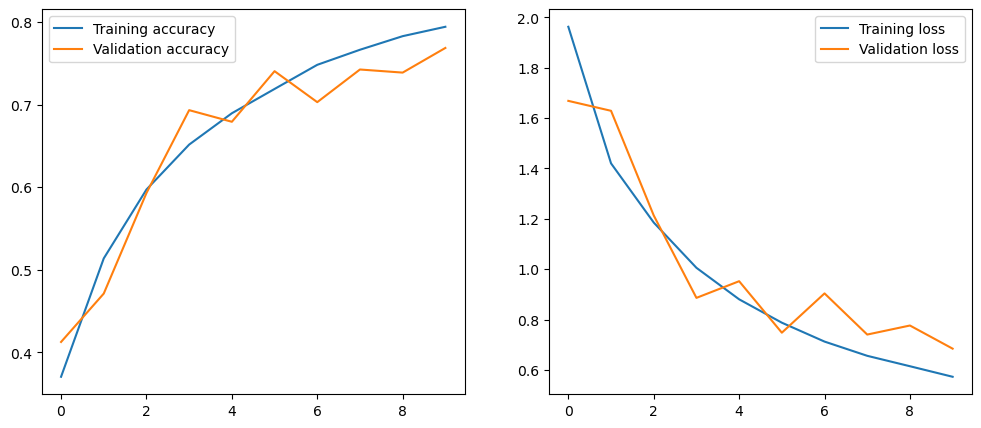

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()